In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

# Load the dataset
file_path = 'data.xlsx'  # Update this with the actual file path
data = pd.read_excel(file_path)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
print(data['Designation'].unique())

['senior quality engineer' 'assistant manager' 'systems engineer'
 'senior software engineer' 'get' 'system engineer'
 'java software engineer' 'mechanical engineer' 'electrical engineer'
 'project engineer' 'senior php developer' 'senior systems engineer'
 'quality assurance engineer' 'qa analyst' 'network engineer'
 'product development engineer' 'associate software developer'
 'data entry operator' 'software engineer' 'developer'
 'electrical project engineer' 'programmer analyst' 'systems analyst'
 'ase' 'telecommunication engineer' 'application developer'
 'ios developer' 'executive assistant' 'online marketing manager'
 'documentation specialist' 'associate software engineer'
 'management trainee' 'site manager' 'software developer' '.net developer'
 'production engineer' 'jr. software engineer'
 'trainee software developer' 'ui developer' 'assistant system engineer'
 'android developer' 'customer service' 'test engineer' 'java developer'
 'engineer' 'recruitment coordinator' 'te

In [7]:
print(data.shape)  # This will print the number of rows and columns

(3998, 39)


In [8]:
print(data.head())

  Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1         

In [9]:
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset contains 3998 rows and 39 columns.


In [10]:
print(data.describe(include='all'))

# Check for missing values
print(data.isnull().sum())

       Unnamed: 0            ID        Salary                            DOJ  \
count        3998  3.998000e+03  3.998000e+03                           3998   
unique          1           NaN           NaN                            NaN   
top         train           NaN           NaN                            NaN   
freq         3998           NaN           NaN                            NaN   
mean          NaN  6.637945e+05  3.076998e+05  2013-07-02 11:04:10.325162496   
min           NaN  1.124400e+04  3.500000e+04            1991-06-01 00:00:00   
25%           NaN  3.342842e+05  1.800000e+05            2012-10-01 00:00:00   
50%           NaN  6.396000e+05  3.000000e+05            2013-11-01 00:00:00   
75%           NaN  9.904800e+05  3.700000e+05            2014-07-01 00:00:00   
max           NaN  1.298275e+06  4.000000e+06            2015-12-01 00:00:00   
std           NaN  3.632182e+05  2.127375e+05                            NaN   

            DOL        Designation    J

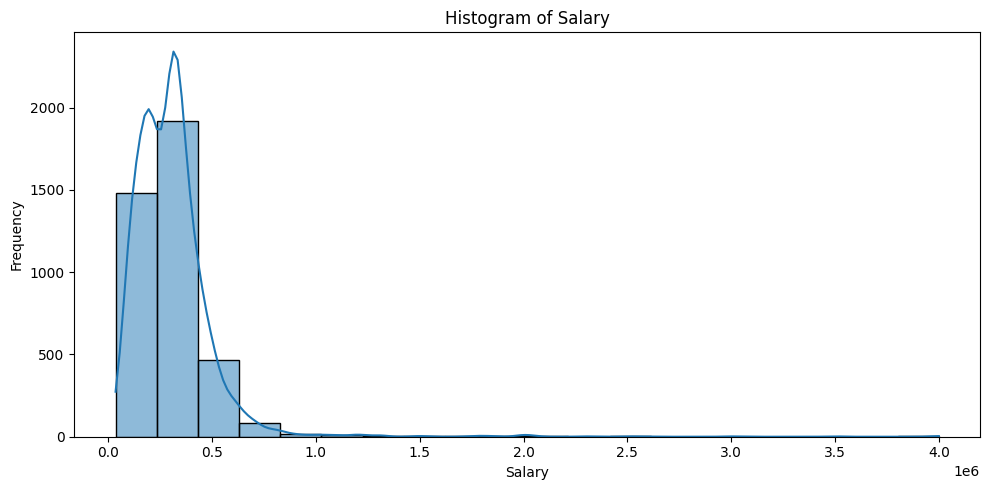

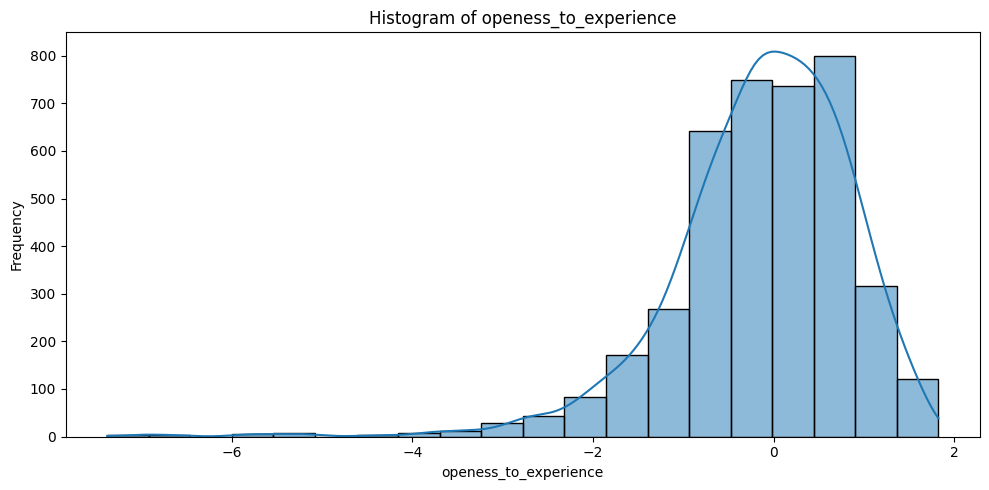

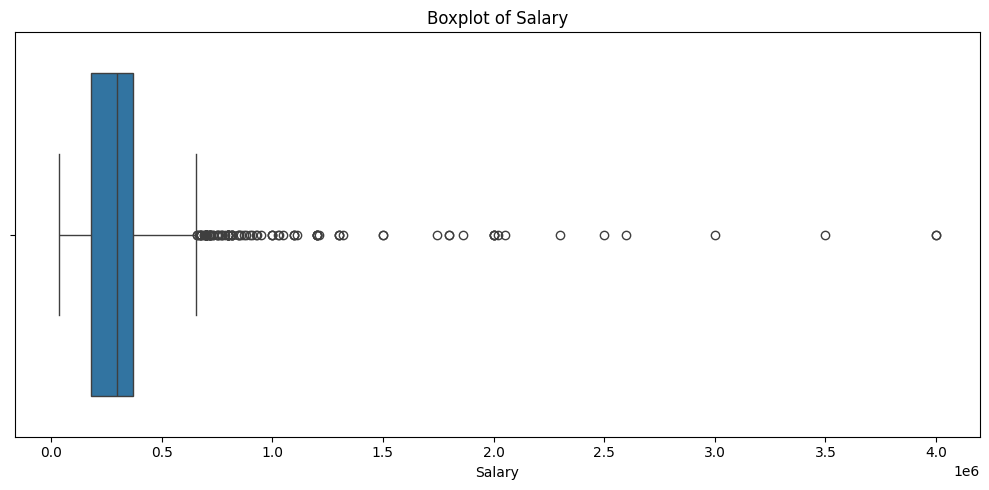

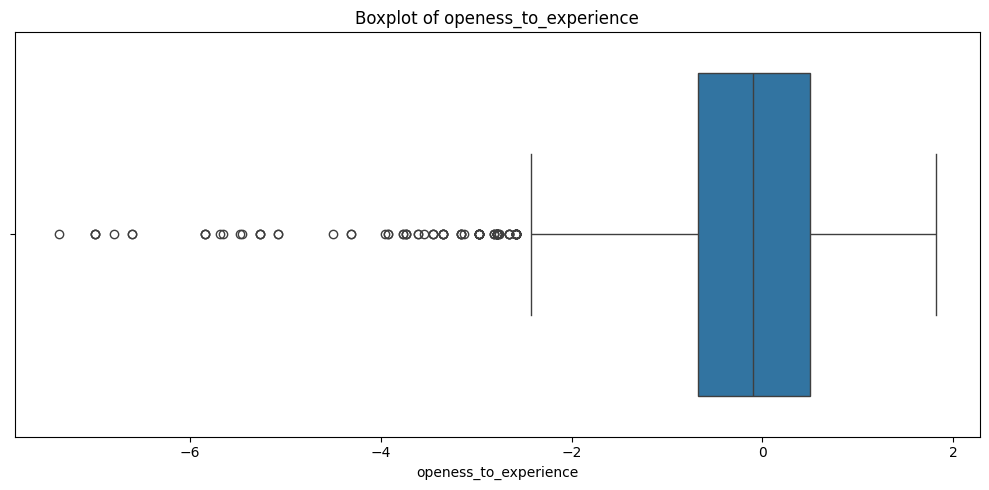

In [13]:
# Define a subset of important numerical columns for the analysis
key_numerical_columns = ['Salary', 'openess_to_experience']  # Modify this list based on your dataset

# Histogram for key numerical columns
for column in key_numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Boxplot for key numerical columns (to check for outliers)
for column in key_numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

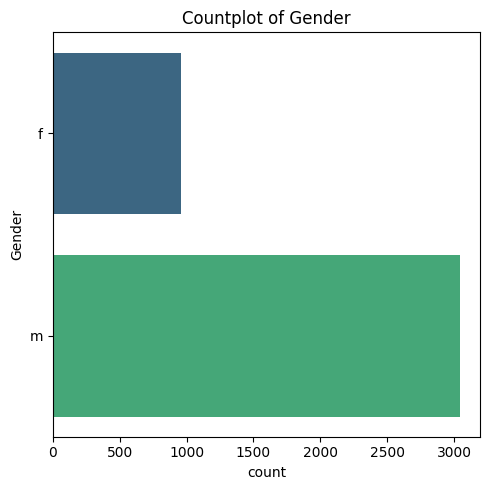

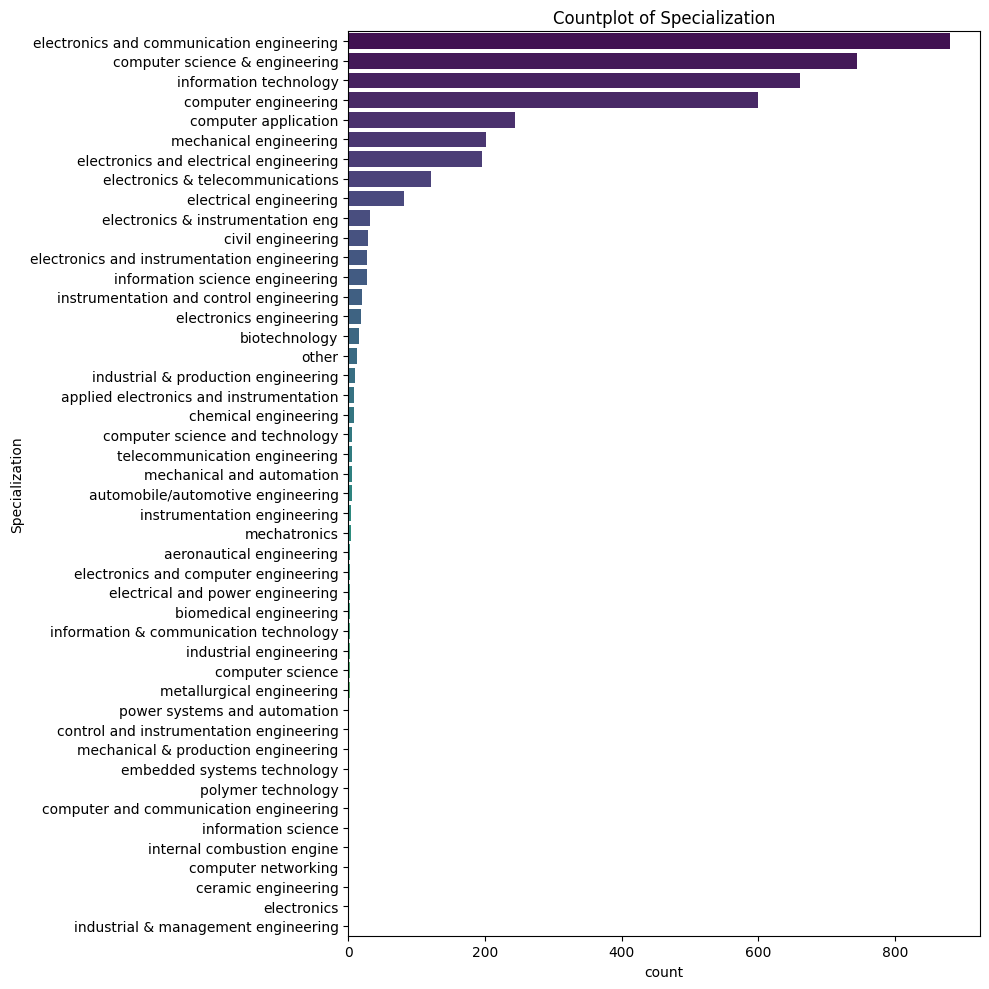

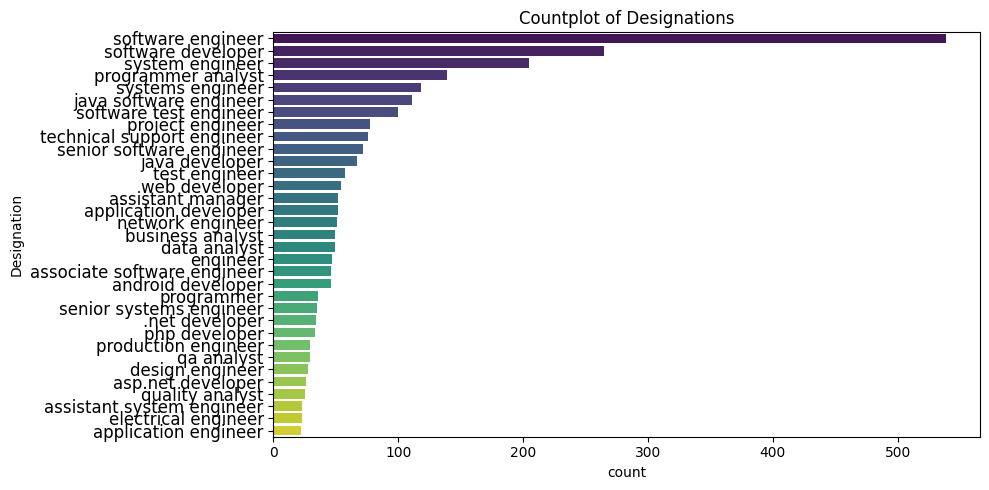

In [14]:
# Countplot for Gender
plt.figure(figsize=(5, 5))
sns.countplot(y=data['Gender'], palette="viridis")
plt.title('Countplot of Gender')
plt.tight_layout()
plt.show()

# Countplot for Specialization
specialization_counts = data['Specialization'].value_counts()
plt.figure(figsize=(10, 10))
sns.countplot(y=data['Specialization'], palette="viridis", order=specialization_counts.index)
plt.title('Countplot of Specialization')
plt.tight_layout()
plt.show()

# Countplot for Designation
designation_counts = data['Designation'].value_counts()
threshold = 20
large_designations = designation_counts[designation_counts > threshold].index
filtered_data = data[data['Designation'].isin(large_designations)]
filtered_data['Designation'] = pd.Categorical(filtered_data['Designation'],
                                               categories=filtered_data['Designation'].value_counts().index,
                                               ordered=True)
plt.figure(figsize=(10, 5))
sns.countplot(y=filtered_data['Designation'], palette="viridis")
plt.title('Countplot of Designations')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

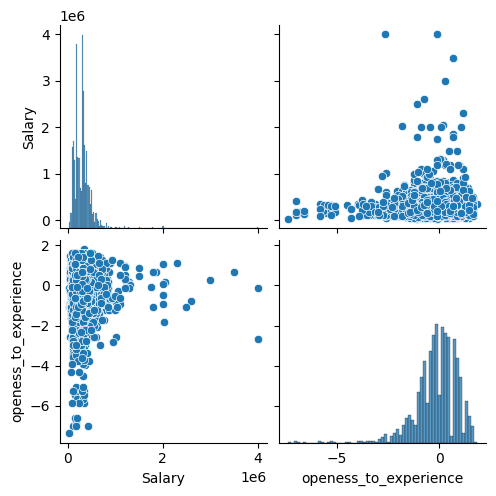

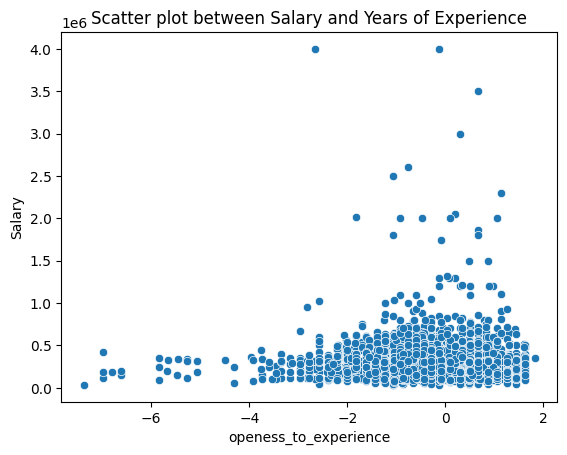

In [15]:
sns.pairplot(data[key_numerical_columns])
plt.show()

# Scatter plot between Salary and another numerical column, e.g., 'YearsExperience'
sns.scatterplot(x='openess_to_experience', y='Salary', data=data)
plt.title('Scatter plot between Salary and Years of Experience')
plt.show()

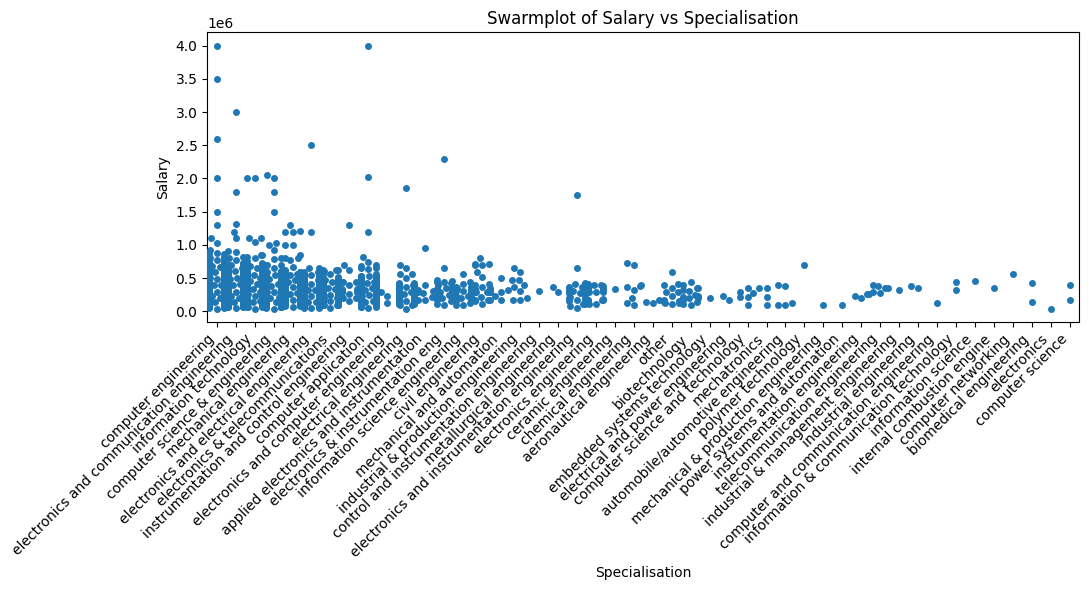

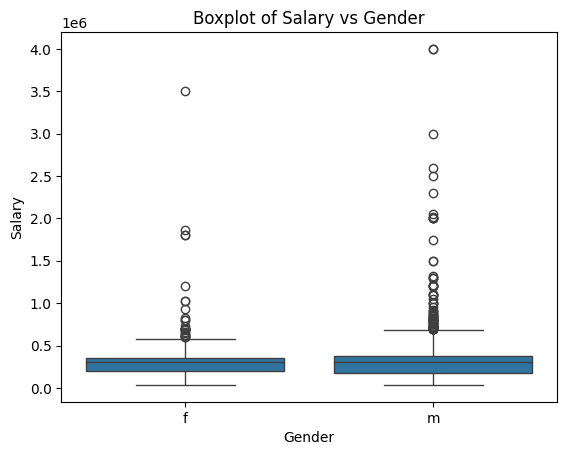

In [23]:
plt.figure(figsize=(11, 6))
sns.swarmplot(x='Specialization', y='Salary', data=data)
plt.title('Swarmplot of Salary vs Specialisation')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Specialisation')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

# Boxplot to explore relationship between Salary and Gender
sns.boxplot(x='Gender', y='Salary', data=data)
plt.title('Boxplot of Salary vs Gender')
plt.show()

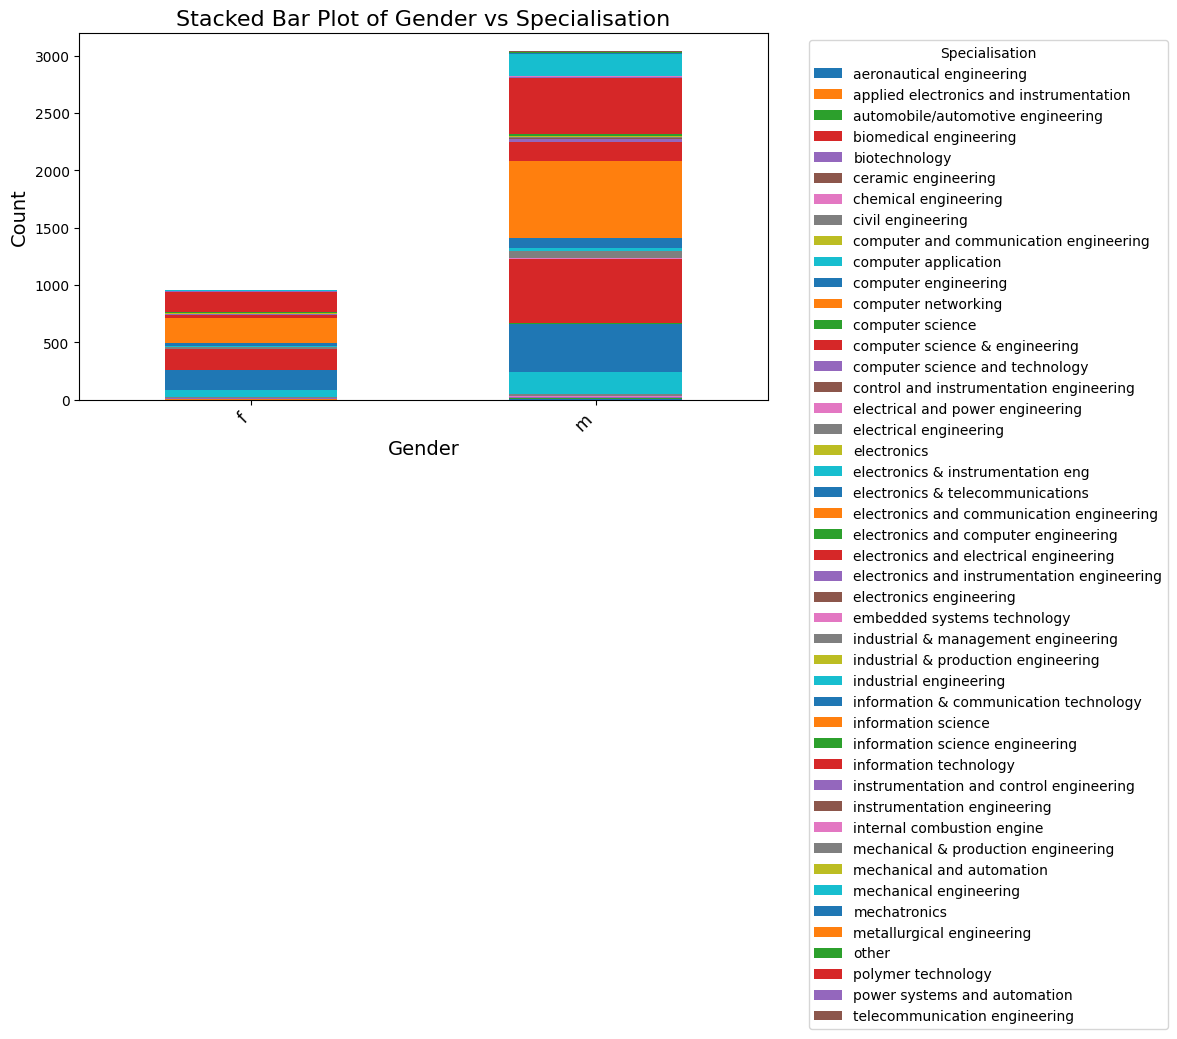

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stacked bar plot to explore relationships between two categorical variables
cross_tab = pd.crosstab(data['Gender'], data['Specialization'])

# Create a figure and axis object with appropriate size
fig, ax = plt.subplots(figsize=(12, 8))

# Create the stacked bar plot
cross_tab.plot(kind='bar', stacked=True, ax=ax)

# Adjust spacing and labels to avoid overlap
plt.title('Stacked Bar Plot of Gender vs Specialisation', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust the legend position
plt.legend(title="Specialisation", bbox_to_anchor=(1.05, 1), loc='upper left')

# Make layout tight to avoid overlap
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
data['Designation'] = data['Designation'].str.strip().str.lower()
roles = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']
filtered_data = data[data['Designation'].isin(roles)]

In [ ]:
if filtered_data.empty:
    print("No matching job roles found.")
else:
    print(filtered_data['Salary'].describe())
    average_salary = filtered_data['Salary'].mean()
    print(f"The average salary for the selected job roles is: {average_salary}")

count    5.530000e+02
mean     3.397920e+05
std      1.443991e+05
min      6.000000e+04
25%      2.500000e+05
50%      3.200000e+05
75%      4.000000e+05
max      1.500000e+06
Name: Salary, dtype: float64
The average salary for the selected job roles is: 339792.0433996383


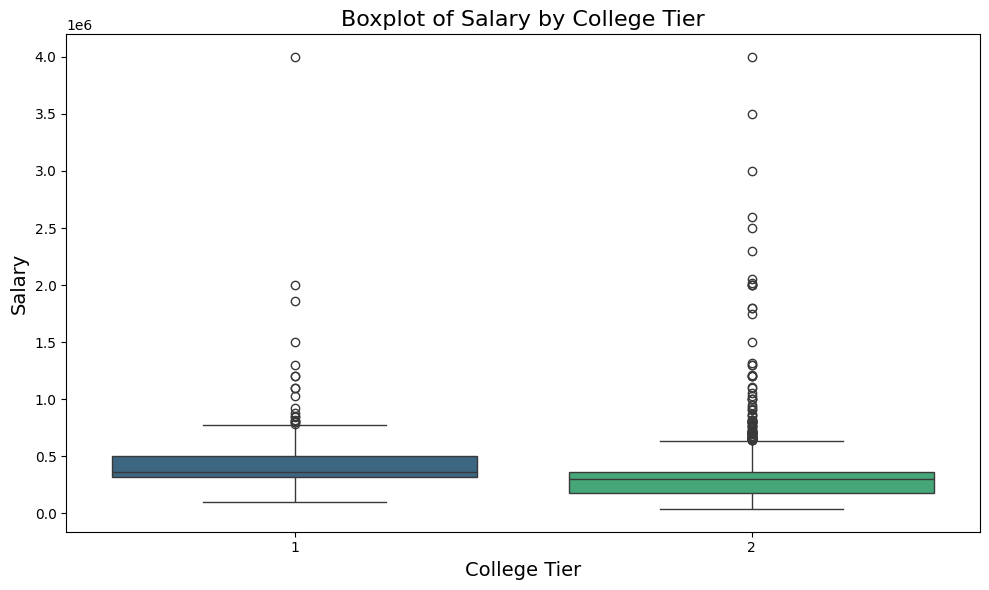

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CollegeTier', y='Salary', data=data, palette='viridis')

# Set the plot title and axis labels
plt.title('Boxplot of Salary by College Tier', fontsize=16)
plt.xlabel('College Tier', fontsize=14)
plt.ylabel('Salary', fontsize=14)

# Adjust the layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
## Conclusion
#- The salary distribution of fresh graduates in roles like Software Engineer, Programming Analyst, etc., shows that the average salary is within the range of 2.5-3 lakhs.
#- There is no significant relationship between gender and specialization based on the chi-square test results.
#- Various factors like years of experience and specialization show significant relationships with salary.

#Further analysis can explore deeper insights into factors influencing salary trends.